In [1]:
import opensrane as opr
import matplotlib.pyplot as plt

# help(osn)


## DS-LOC connector 

* DS-LOC: Is used to connect some outflow models to a fragility case. So, anytime that this fragility happens for a plant unit, one of the assigned outflow models will be consider as the outflow model for damaged plant unit.


### In the follwing cell, the class behaviour in definition and giving output has checked:

In [34]:
opr.wipe()


opr.Fragilities.Fragility(1,'No Fragility Mode name','normal',5,2)
opr.Fragilities.Fragility(2,'No Fragility Mode name','lognormal',5,2)
opr.Fragilities.Fragility(3,'No Fragility Mode name','lognormal',[1,2,3,4,5],[1,2,4,5,6])

#Define Outflow Models
tag=1
opr.OutFlowModel.TankHole(tag, Hole_Diameter=0.05, Hole_Height_FromBot=0, delta_t=100, Cd=1)
opr.OutFlowModel.TankHole(2, Hole_Diameter=0.01, Hole_Height_FromBot=1, delta_t=150, Cd=0.62)
opr.OutFlowModel.TankHole(3, Hole_Diameter=0.5, Hole_Height_FromBot=0.5, delta_t=100, Cd=0.62)
opr.OutFlowModel.Liquid10min(4)
opr.OutFlowModel.Liquid10min(5)

####Attention : DS_LOC objects tag is same Fragility tag####

obj1=opr.Connectors.DS_LOC(1,1,[1,4,3],[6,3,1]) #Define the DS_LOC for fragility 1
obj2=opr.Connectors.DS_LOC(2,2,[5,3,1],[4,3,3])

print("List of the defined Outflow models tag for damage state 1:",obj1.OutFlowModelTagList)
print("List of the outflow models selection probability for damage state 1:", obj1.LOCProbabilityList)
print("Tag of DS-LOC tag: ", obj1.tag)

# Usage of Give1OutFlowModel function for Ds_Loc Objects that Give 1 outflow model name accoding defined out flow models and their corresponding probability values for the corresponding fragility 
print("A random OutFlow model selection for damage state 1: ", obj1.Give1OutFlowModel().tag);

List of the defined Outflow models tag for damage state 1: [1, 4, 3]
List of the outflow models selection probability for damage state 1: [0.6, 0.3, 0.1]
Tag of DS-LOC tag:  1
A random OutFlow model selection for damage state 1:  1


### In the following example the selection of the outflow models according to defined distribution has been checked for DS-LOC class:

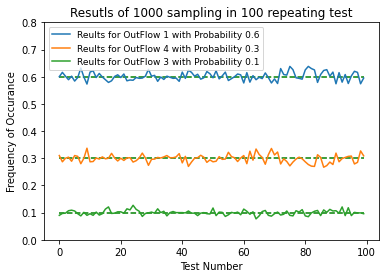

In [35]:
#Verify DS-LOC Distribution
opr.wipe()

#Define Some Imaginary Outflow Models
tag=1
opr.OutFlowModel.TankHole(tag, Hole_Diameter=0.05, Hole_Height_FromBot=0, delta_t=100, Cd=1)
opr.OutFlowModel.TankHole(2, Hole_Diameter=0.01, Hole_Height_FromBot=1, delta_t=150, Cd=0.62)
opr.OutFlowModel.TankHole(3, Hole_Diameter=0.5, Hole_Height_FromBot=0.5, delta_t=100, Cd=0.62)
opr.OutFlowModel.Liquid10min(4)
opr.OutFlowModel.Liquid10min(5)

#Define a DS_LOC 
DSLOCOBJ=opr.Connectors.DS_LOC(tag=1,FragilityTag=1,OutFlowModelTagList=[1,4,3],LOCProbabilityList=[6,3,1]) 

Generated=[]
for i in range(100):
    N=1000
    rslt=dict()
    rslt={i:0 for i in DSLOCOBJ.OutFlowModelTagList}
    for i in range(N):
        obj=DSLOCOBJ.Give1OutFlowModel()
        rslt[obj.tag]=rslt[obj.tag]+1

    for i,j in rslt.items():
        rslt[i]=j/N
    
    Generated.append(rslt)


plt.figure()

plt.plot([0.6 for i in Generated], color='green',linestyle='dashed')
plt.plot([0.3 for i in Generated], color='green',linestyle='dashed')
plt.plot([0.1 for i in Generated], color='green',linestyle='dashed')

plt.plot([i[1] for i in Generated], label='Reults for OutFlow 1 with Probability 0.6')
plt.plot([i[4] for i in Generated], label='Reults for OutFlow 4 with Probability 0.3')
plt.plot([i[3] for i in Generated], label='Reults for OutFlow 3 with Probability 0.1')

plt.title('Resutls of 1000 sampling in 100 repeating test')
plt.xlabel('Test Number')
plt.ylabel('Frequency of Occurance')
plt.ylim(0,0.8)
plt.legend(loc=2,fontsize = 9);


### In the following example the selection of the outflow models according to defined distribution has been checked for Pb-LOC class:

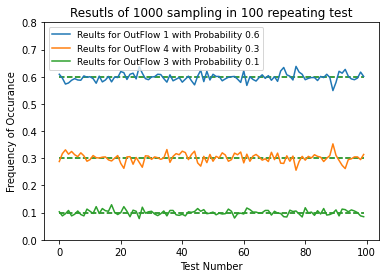

In [36]:
#Verify Pb-LOC Distribution
opr.wipe()

#Define Some Imaginary Outflow Models
tag=1
opr.OutFlowModel.TankHole(tag, Hole_Diameter=0.05, Hole_Height_FromBot=0, delta_t=100, Cd=1)
opr.OutFlowModel.TankHole(2, Hole_Diameter=0.01, Hole_Height_FromBot=1, delta_t=150, Cd=0.62)
opr.OutFlowModel.TankHole(3, Hole_Diameter=0.5, Hole_Height_FromBot=0.5, delta_t=100, Cd=0.62)
opr.OutFlowModel.Liquid10min(4)
opr.OutFlowModel.Liquid10min(5)

#Define a DS_LOC 
DSLOCOBJ=opr.Connectors.Pb_LOC(tag=1,ProbitTag=1,OutFlowModelTagList=[1,4,3],LOCProbabilityList=[6,3,1]) 

Generated=[]
for i in range(100):
    N=1000
    rslt=dict()
    rslt={i:0 for i in DSLOCOBJ.OutFlowModelTagList}
    for i in range(N):
        obj=DSLOCOBJ.Give1OutFlowModel()
        rslt[obj.tag]=rslt[obj.tag]+1

    for i,j in rslt.items():
        rslt[i]=j/N
    
    Generated.append(rslt)


plt.figure()

plt.plot([0.6 for i in Generated], color='green',linestyle='dashed')
plt.plot([0.3 for i in Generated], color='green',linestyle='dashed')
plt.plot([0.1 for i in Generated], color='green',linestyle='dashed')

plt.plot([i[1] for i in Generated], label='Reults for OutFlow 1 with Probability 0.6')
plt.plot([i[4] for i in Generated], label='Reults for OutFlow 4 with Probability 0.3')
plt.plot([i[3] for i in Generated], label='Reults for OutFlow 3 with Probability 0.1')

plt.title('Resutls of 1000 sampling in 100 repeating test')
plt.xlabel('Test Number')
plt.ylabel('Frequency of Occurance')
plt.ylim(0,0.8)
plt.legend(loc=2,fontsize = 9);


### In the following example the selection of the outflow models according to defined distribution has been checked for Out-Physic class:

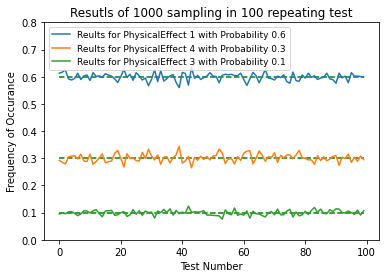

In [37]:
#Verify Out_Physic Distribution
opr.wipe()

#Define Physical Effect models
opr.PhysicalEffect.fire_point_source(tag=1, minf=0.055, k=1.5)
opr.PhysicalEffect.fire_point_source(tag=2, minf=0.06, k=1.3)
opr.PhysicalEffect.SAFE(3)
opr.PhysicalEffect.VCE_TNT(4)

#Define a DS_LOC 
DSLOCOBJ=opr.Connectors.Out_Physic(tag=1,OutFlowTag=1,MaterialsTagList=[1],PhysicalEffectTagList=[1,4,3],PhysProbabilityList=[6,3,1])

Generated=[]
for i in range(100):
    N=1000
    rslt=dict()
    rslt={i:0 for i in DSLOCOBJ.PhysicalEffectTagList}
    for i in range(N):
        obj=DSLOCOBJ.Give1PhysicalEffectModel()
        rslt[obj.tag]=rslt[obj.tag]+1

    for i,j in rslt.items():
        rslt[i]=j/N
    
    Generated.append(rslt)

plt.figure()

plt.plot([0.6 for i in Generated], color='green',linestyle='dashed')
plt.plot([0.3 for i in Generated], color='green',linestyle='dashed')
plt.plot([0.1 for i in Generated], color='green',linestyle='dashed')

plt.plot([i[1] for i in Generated], label='Reults for PhysicalEffect 1 with Probability 0.6')
plt.plot([i[4] for i in Generated], label='Reults for PhysicalEffect 4 with Probability 0.3')
plt.plot([i[3] for i in Generated], label='Reults for PhysicalEffect 3 with Probability 0.1')

plt.title('Resutls of 1000 sampling in 100 repeating test')
plt.xlabel('Test Number')
plt.ylabel('Frequency of Occurance')
plt.ylim(0,0.8)
plt.legend(loc=2,fontsize = 9);
